**Questions for Analysis**

1. What is the distribution of gender?
2. Is there a correlation between the reading score and writing score?
3. The relationship between parent marital status and student performance in Math, Reading and Writing
4. The relationship between parent education and student performance in Math, Reading and Writing
5. Are there outliers in the various scores?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset

scores = pd.read_csv("Students Exam Scores.csv")

#viewing the top of my dataset
scores.head(20)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [3]:
scores.tail(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30631,765,male,group E,some high school,standard,none,married,sometimes,no,3.0,school_bus,< 5,80,65,66
30632,778,female,group D,some college,standard,none,married,regularly,no,3.0,private,5 - 10,82,88,97
30633,783,female,group C,master's degree,standard,completed,married,never,no,2.0,school_bus,5 - 10,84,99,99
30634,785,male,group A,associate's degree,free/reduced,completed,NaN,sometimes,no,2.0,school_bus,5 - 10,65,60,60
30635,794,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [4]:
#viewing the number of rows and column in scores
scores.shape

(30641, 15)

There are 30641 rows and 15 columns 

In [5]:
#description of the dataset
scores.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
#viweing the details of the dataset
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


There are multiple null values in multiple columns

In [7]:
#checking for duplicates
scores.duplicated().sum()


0

There are no duplicates in this dataset

In [8]:
#clearing all leading and trailing whitespaces in string columns
col_names = ["Gender","EthnicGroup","ParentEduc","LunchType",
             "TestPrep","ParentMaritalStatus","PracticeSport",
             "IsFirstChild", "TransportMeans", "WklyStudyHours"]

for col in col_names:
    scores[col] = scores[col].str.strip()

In [9]:
scores

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [10]:
#dropping the unnamed column in the dataset
scores.drop(scores.columns[0], axis = 1, inplace = True)
scores.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [11]:
scores.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [12]:
#renaming all the columns
col_map = {"Gender":"gender",
            "EthnicGroup":"ethnic_group",
            "ParentEduc":"parent_edu_lvl",
            "LunchType":"lunch_type",
             "TestPrep": "test_prep",
            "ParentMaritalStatus": "parent_marital_stat",
            "PracticeSport":"practice_sport",
             "IsFirstChild":"first_child",
            "NrSiblings":"sibling_num",
            "TransportMeans":"transport_means",
             "WklyStudyHours":"study_hours",
            "MathScore":"math_score",
            "ReadingScore":"reading_score",
            "WritingScore":"writing_score"}

def renaming_columns(col_map):
    scores.rename(columns = col_map, inplace = True)
    return scores.head(5)


In [13]:
#running the function
renaming_columns(col_map)


,gender,ethnic_group,parent_edu_lvl,lunch_type,test_prep,parent_marital_stat,practice_sport,first_child,sibling_num,transport_means,study_hours,math_score,reading_score,writing_score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [14]:
#looking at the number of unique values in each column
#defining the string columns

col_names = ["gender","ethnic_group","parent_edu_lvl","lunch_type",
             "test_prep","parent_marital_stat","practice_sport",
             "first_child", "transport_means", "study_hours"]

#using a for loop to display results
for col in col_names:
    ans = scores[col].nunique()
    
#visualising the results
    print(f"Number of unique values in {col} : {ans}")
    print("\n")

Number of unique values in gender : 2


Number of unique values in ethnic_group : 5


Number of unique values in parent_edu_lvl : 6


Number of unique values in lunch_type : 2


Number of unique values in test_prep : 2


Number of unique values in parent_marital_stat : 4


Number of unique values in practice_sport : 3


Number of unique values in first_child : 2


Number of unique values in transport_means : 2


Number of unique values in study_hours : 3




In [15]:
#replacing the null values

# creating a column list
null_columns = ["parent_edu_lvl", "test_prep","parent_marital_stat",
               "practice_sport","first_child","transport_means",
               "study_hours"]

#replacing values
scores[null_columns] = scores[null_columns].fillna(value='unknown')


#suggestion is to fill in the nulls with the most occurring values in each column

In [16]:
#replacing null values in the ethnic group column with "other"
scores["ethnic_group"] = scores["ethnic_group"].fillna(value='other')

In [17]:
scores.head(20)

,gender,ethnic_group,parent_edu_lvl,lunch_type,test_prep,parent_marital_stat,practice_sport,first_child,sibling_num,transport_means,study_hours,math_score,reading_score,writing_score
0,female,other,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [18]:
#replacing the "5 - 10" with "5-10"
scores["study_hours"] = scores["study_hours"].str.replace("5 - 10", "5-10", regex=True)
scores.head(10)

,gender,ethnic_group,parent_edu_lvl,lunch_type,test_prep,parent_marital_stat,practice_sport,first_child,sibling_num,transport_means,study_hours,math_score,reading_score,writing_score
0,female,other,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5-10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5-10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [19]:
# Define a custom function to calculate average score
def av_score(row):
    return (row['math_score'] + row['reading_score'] + row['writing_score']) / 3

# Apply the function to create a new column 'AverageScore'
scores['average_score'] = scores.apply(av_score, axis=1)

#viewing the scores
scores.head(5)


,gender,ethnic_group,parent_edu_lvl,lunch_type,test_prep,parent_marital_stat,practice_sport,first_child,sibling_num,transport_means,study_hours,math_score,reading_score,writing_score,average_score
0,female,other,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.000000
1,female,group C,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5-10,69,90,88,82.333333
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5-10,45,56,42,47.666667
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75,76.333333


In [20]:
#Checking the number of null values in each column
scores.isnull().sum()

gender                    0
ethnic_group              0
parent_edu_lvl            0
lunch_type                0
test_prep                 0
parent_marital_stat       0
practice_sport            0
first_child               0
sibling_num            1572
transport_means           0
study_hours               0
math_score                0
reading_score             0
writing_score             0
average_score             0
dtype: int64

# Visualisation

In [21]:
scores

,gender,ethnic_group,parent_edu_lvl,lunch_type,test_prep,parent_marital_stat,practice_sport,first_child,sibling_num,transport_means,study_hours,math_score,reading_score,writing_score,average_score
0,female,other,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.000000
1,female,group C,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5-10,69,90,88,82.333333
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5-10,45,56,42,47.666667
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5-10,59,61,65,61.666667
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5-10,58,53,51,54.000000
30638,female,other,high school,free/reduced,completed,married,sometimes,no,1.0,private,5-10,61,70,67,66.000000
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5-10,82,90,93,88.333333


In [22]:
gender_count = scores["gender"].value_counts()
gender_count

female    15424
male      15217
Name: gender, dtype: int64

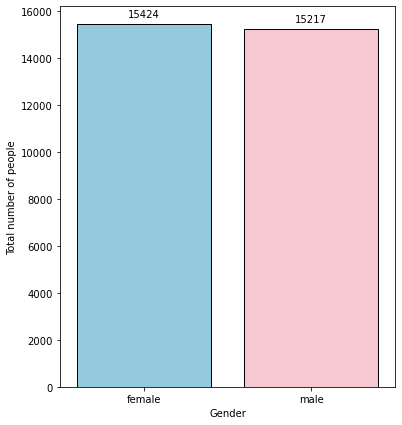

In [23]:
plt.figure(figsize=(6, 7))
ax = sns.countplot(data=scores, x="gender", palette=["skyblue", "pink"], edgecolor="black")

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color="black")

# Set x-axis and y-axis labels
ax.set_xlabel("Gender")
ax.set_ylabel("Total number of people")

plt.show()

There are more females within the sample than males

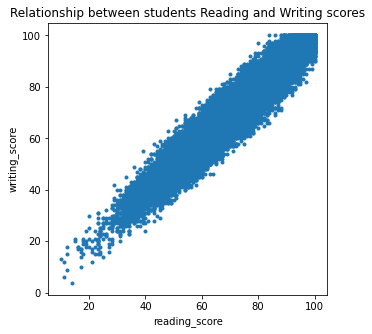

In [25]:
plt.figure(figsize = (5,5))
plt.scatter(scores['reading_score'], scores['writing_score'], marker = '.')
plt.title("Relationship between students Reading and Writing scores")
plt.xlabel("reading_score")
plt.ylabel("writing_score")
plt.show()

As seen in the chart above, the is a strong correlation between student reading and writing scores.

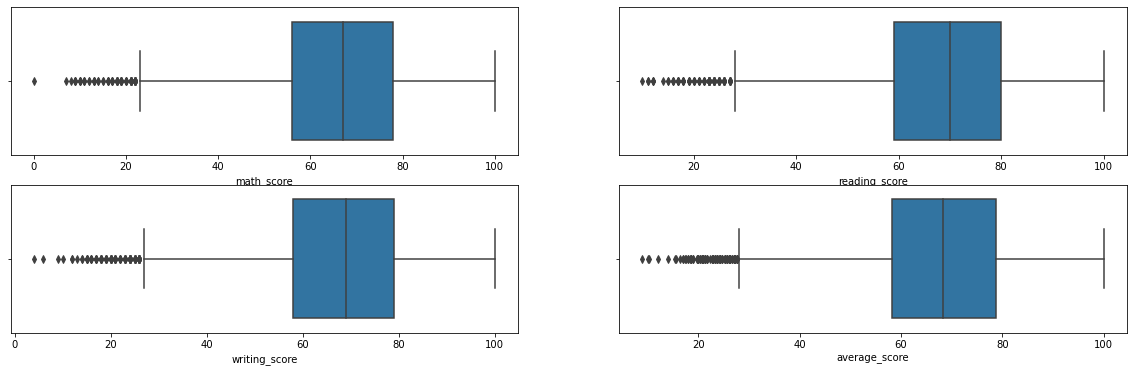

In [27]:
plt.figure(figsize=(20,6))

plt.subplot(2,2,1)
sns.boxplot(data = scores, x ="math_score")

plt.subplot(2,2,2)
sns.boxplot(data = scores, x ="reading_score")

plt.subplot(2,2,3)
sns.boxplot(data = scores, x ="writing_score")

plt.subplot(2,2,4)
sns.boxplot(data = scores, x = "average_score")

plt.show()

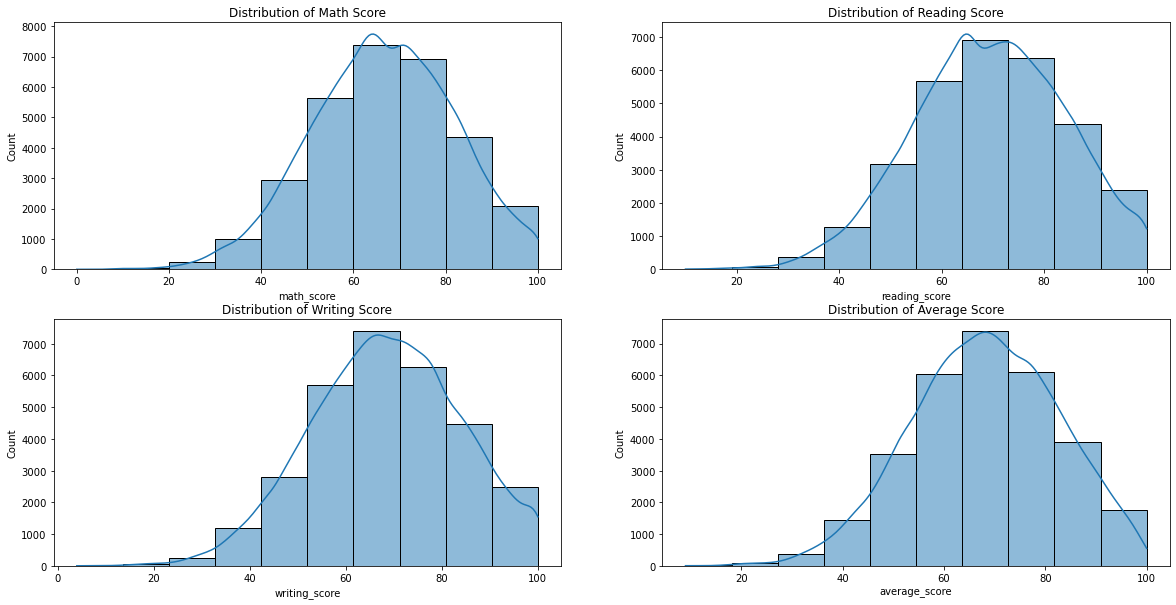

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot(data = scores, x = "math_score", bins = 10, kde = True)
plt.title("Distribution of Math Score")

plt.subplot(2,2,2)
sns.histplot(data = scores, x = "reading_score", bins = 10, kde = True)
plt.title("Distribution of Reading Score")

plt.subplot(2,2,3)
sns.histplot(data = scores, x = "writing_score", bins = 10, kde = True)
plt.title("Distribution of Writing Score")

plt.subplot(2,2,4)
sns.histplot(data = scores, x = "average_score", bins = 10, kde = True)
plt.title("Distribution of Average Score")
plt.show()

**Ethnic Group**

In [29]:
scores["ethnic_group"].unique()

array(['other', 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

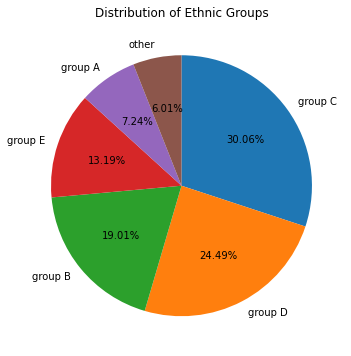

In [39]:
# Group and count occurrences of each ethnic group
ethnic_group_counts = scores['ethnic_group'].value_counts()

# Create a list of counts and labels
mlist = ethnic_group_counts.values
labels = ethnic_group_counts.index

# Plotting the donut chart
plt.figure(figsize=(8, 6))
plt.pie(mlist, labels=labels, autopct="%1.2f%%", startangle=90, counterclock=False)  # Set width to create a hole and use white edgecolor
plt.title("Distribution of Ethnic Groups")
plt.show()

Ethnic group C has the largest distribution

**Relationship between scores and Level of eductaion and marital status**

In [42]:
p_edu = scores.groupby("parent_edu_lvl").agg({"math_score": "mean","reading_score":"mean","writing_score":"mean"})
p_edu

,math_score,reading_score,writing_score
parent_edu_lvl,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409
unknown,66.645528,69.225474,68.295935


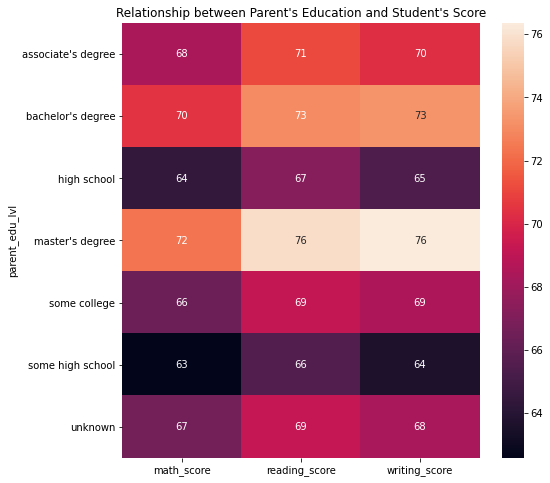

In [48]:
plt.figure(figsize=(8, 8))
sns.heatmap(p_edu, annot=True)  
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

The above chart shows that the education of parent have a good impact on their scores.

In [50]:
mar_stat = scores.groupby("parent_marital_stat").agg({"math_score": "mean","reading_score":"mean","writing_score":"mean"})
mar_stat

,math_score,reading_score,writing_score
parent_marital_stat,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
unknown,66.548739,69.237815,68.196639
widowed,67.368866,69.651438,68.563452


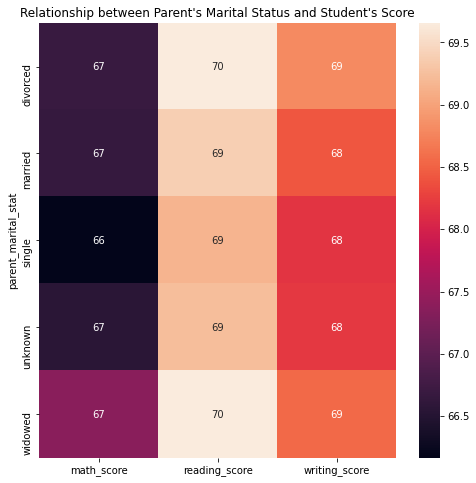

In [51]:
plt.figure(figsize = (8,8))
sns.heatmap(mar_stat, annot = True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

Marital status has a negligible impact on the students scores